# 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import janitor
import gc
import time
from datetime import datetime
import matplotlib.pyplot as plt
start_time = time.time()

# 2. Define State below

In [2]:
state = 'california'

# 3. Run the codes below

In [3]:
def combine_cities_list(RCV_list, NonRCV_list):

    print("total number of cities:", len(RCV_list))

    print("number of distinct cities:", len(set(NonRCV_list)))

    print("name of cities that were duplicated:", set([x for x in NonRCV_list if NonRCV_list.count(x) > 1]))

    combined_cityName = RCV_list+list(set(NonRCV_list))
    print("number of distinct RCV and sampled nonRCV cities:", len(combined_cityName))
    return combined_cityName

In [4]:
if state=='california':
    # ------ California -------

    ## change the filepath as required, we have selected the folder with the latest date

    filepath = '../data/VM2--CA--2022-04-25/'
    DEMO_filename = 'VM2--CA--2022-04-25-DEMOGRAPHIC_selected_cols.parquet'
    VOTE_filename = 'VM2--CA--2022-04-25-VOTEHISTORY_selected_cols.parquet'
    elec_dates_filename = 'GE_LM_dates_per_city_CA.parquet'
    cities_filename = 'ca-cities.csv'

    # 1. List of RCV and non-RCV cities 

    RCV_cities_CA = ['San Francisco',
     'Oakland',
     'Berkeley',
     'San Leandro',
     'Palm Desert',
     'Eureka',
     'Albany']

    sampled_nonRCV_cities_CA = ['Fresno',
     'San Diego',
     'Sacramento',
     'Riverside',
     'San Jose',
     'Santa Ana',
     'Anaheim',
     'Santa Rosa',
     'Merced',
     'Santa Clarita',
     'Alhambra',
     'Davis',
     'Montebello',
     'Burbank',
     'Huntington Park',
     'Bellflower',
     'Watsonville',
     'Gilroy',
     'Whittier',
     'Lynwood',
     'Lakewood',
     'Pico Rivera',
     'Lake Forest',
     'Livermore',
     'Chino Hills',
     'Paramount',
     'El Paso de Robles',
     'Pico Rivera',
     'Buena Park',
     'Whittier',
     'Calabasas',
     'Carpinteria',
     'Morro Bay',
     'San Carlos',
     'Solvang']

    combined_sampled_cityName = combine_cities_list(RCV_list= RCV_cities_CA, NonRCV_list = sampled_nonRCV_cities_CA)
    # ---------------------

total number of cities: 7
number of distinct cities: 33
name of cities that were duplicated: {'Whittier', 'Pico Rivera'}
number of distinct RCV and sampled nonRCV cities: 40


In [5]:
merge_filename = DEMO_filename.replace('DEMOGRAPHIC_selected_cols.parquet', 'merged.parquet')
merged_file = pd.read_parquet(f'{filepath}{merge_filename}')

In [6]:
def replace_ethnicities(df):
    df = df.replace('East and South Asian', 'asian')
    df = df.replace('European', 'white')
    df = df.replace('Hispanic and Portuguese', 'hispanic')
    df = df.replace('Likely African-American', 'black')
    df = df.replace('Other', 'others') # including 'others' ethnical group
    return df

In [7]:
merged_file = replace_ethnicities(merged_file)

In [8]:
GE_cols = [col for col in merged_file.columns if col.startswith('General')]
print(GE_cols)
LM_cols = [col for col in merged_file.columns if col.startswith('Local_or_Municipal') \
           or col.startswith('Consolidated_General')]
print(LM_cols)

['General_2016_11_08', 'General_2014_11_04', 'General_2018_11_06', 'General_2020_11_03']
['Consolidated_General_2009_11_03', 'Local_or_Municipal_2019_06_04', 'Consolidated_General_2015_11_03', 'Local_or_Municipal_2015_03_03', 'Local_or_Municipal_2015_06_02', 'Local_or_Municipal_2013_03_05', 'Local_or_Municipal_2021_06_08', 'Local_or_Municipal_2013_08_27', 'Consolidated_General_2017_11_07', 'Local_or_Municipal_2017_03_07', 'Consolidated_General_2013_11_05', 'Local_or_Municipal_2017_04_11', 'Local_or_Municipal_2017_02_28', 'Local_or_Municipal_2012_05_08', 'Local_or_Municipal_2019_03_05', 'Consolidated_General_2011_11_08', 'Local_or_Municipal_2015_05_19', 'Consolidated_General_2019_11_05', 'Local_or_Municipal_2015_04_14', 'Consolidated_General_2021_11_02']


In [9]:
# fill NA values with "N" to make it easier to compare  with "Y"
merged_file[GE_cols+LM_cols] = merged_file[GE_cols+LM_cols].fillna('N')
merged_file.head()

,LALVOTERID,Consolidated_General_2009_11_03,General_2016_11_08,Local_or_Municipal_2019_06_04,Consolidated_General_2015_11_03,Local_or_Municipal_2015_03_03,Local_or_Municipal_2015_06_02,General_2014_11_04,Local_or_Municipal_2013_03_05,Local_or_Municipal_2021_06_08,...,Voters_BirthDate,Parties_Description,EthnicGroups_EthnicGroup1Desc,Voters_OfficialRegDate,County,CommercialData_Education,CommercialData_EstimatedHHIncome,CommercialData_EstimatedHHIncomeAmount,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount
0,LALCA453164106,N,Y,N,N,N,N,N,N,N,...,04/29/1993,Democratic,others,06/18/2021,ALAMEDA,None,None,None,None,None
1,LALCA453008306,N,N,N,N,N,N,N,N,N,...,02/02/1996,Non-Partisan,black,04/01/2021,ALAMEDA,None,None,None,None,None
2,LALCA22129469,N,Y,N,N,N,N,Y,N,N,...,02/02/1975,Democratic,white,11/16/2021,ALAMEDA,HS Diploma - Extremely Likely,None,None,None,None
3,LALCA549803906,N,N,N,N,N,N,N,N,N,...,02/09/1962,Democratic,others,02/07/2022,ALAMEDA,None,None,None,None,None
4,LALCA24729024,N,N,N,N,N,N,N,N,N,...,01/01/1966,Democratic,white,02/28/2016,ALAMEDA,HS Diploma - Extremely Likely,None,None,None,None


In [10]:
elec_date_cols = GE_cols+LM_cols

In [11]:
age_per_election = merged_file[['Residence_Addresses_City', 'Voters_BirthDate']+elec_date_cols].drop_duplicates()

In [12]:
melt_age_df = age_per_election.melt(id_vars=['Residence_Addresses_City', 'Voters_BirthDate'],
                                       value_vars=elec_date_cols,
                                       var_name='elec_type_date',
                                       value_name='voted')

In [13]:
melt_age_df = melt_age_df[melt_age_df['voted'] == 'Y']

In [14]:
elec_date_dict = pd.DataFrame(elec_date_cols, columns = ['elec_type_date'])
elec_date_dict['date'] = elec_date_dict['elec_type_date'].str.slice(-5,-3) + '/' + elec_date_dict['elec_type_date'].str.slice(-2) + '/' + elec_date_dict['elec_type_date'].str.slice(-10,-6)
melt_age_df = melt_age_df.merge(elec_date_dict,
                                    how = 'inner', 
                                    on = ['elec_type_date'])
melt_age_df.rename(columns = {'date': 'voting_date'}, inplace = True)
melt_age_df['Voters_BirthDate'] = pd.to_datetime(melt_age_df['Voters_BirthDate'], format='%m/%d/%Y')
melt_age_df['voting_date'] = pd.to_datetime(melt_age_df['voting_date'], format='%m/%d/%Y')
melt_age_df['age_on_vote'] = (melt_age_df['voting_date'] - melt_age_df['Voters_BirthDate']) / np.timedelta64(1, 'Y')
melt_age_df['elec_date'] = melt_age_df['elec_type_date'].str[-10:]
melt_age_df['elec_year'] = melt_age_df['elec_type_date'].str[-10:-6]
melt_age_df['elec_type'] = melt_age_df['elec_type_date'].str[:-11]

In [15]:
age_df = melt_age_df.groupby(['voting_date', 'elec_type']).agg({'age_on_vote':'mean'}).reset_index()
age_df.rename(columns = {'age_on_vote': 'mean_age'}, inplace = True)
age_df['voting_date'] = age_df['voting_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
age_df

,voting_date,elec_type,mean_age
0,2009-11-03,Consolidated_General,53.167067
1,2011-11-08,Consolidated_General,52.629591
2,2012-05-08,Local_or_Municipal,46.860462
3,2013-03-05,Local_or_Municipal,52.420360
4,2013-08-27,Local_or_Municipal,54.929105
5,2013-11-05,Consolidated_General,55.115742
6,2014-11-04,General,53.020494
7,2015-03-03,Local_or_Municipal,55.827403
8,2015-04-14,Local_or_Municipal,57.939221
9,2015-05-19,Local_or_Municipal,53.997919


In [16]:
age_df_all = melt_age_df.groupby(['elec_type']).agg({'age_on_vote':'mean'}).reset_index()
age_df_all.rename(columns = {'age_on_vote': 'mean_age'}, inplace = True)
age_df_all

,elec_type,mean_age
0,Consolidated_General,53.987930
1,General,50.843755
2,Local_or_Municipal,56.673941


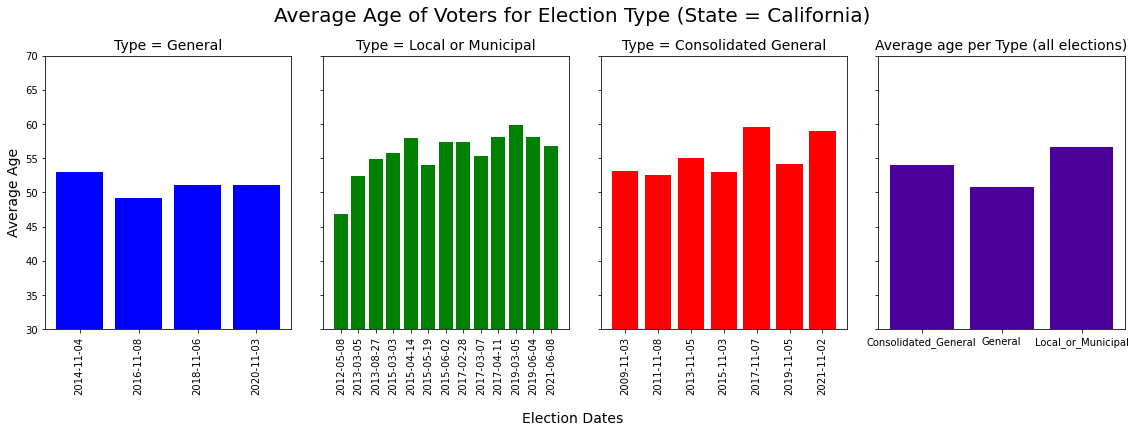

In [17]:
# ploting the graph

fig_age, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16,6), sharey = True)

#axes[0] = General per election
axes[0].bar((age_df[age_df['elec_type']=='General'])['voting_date'], 
            (age_df[age_df['elec_type']=='General'])['mean_age'],
           color='blue')
axes[0].set_title('Type = General', fontsize=14)
axes[0].set_xticks((age_df[age_df['elec_type']=='General'])['voting_date'], (age_df[age_df['elec_type']=='General'])['voting_date'], rotation='vertical')
axes[0].set_ylabel('Average Age', fontsize=14)
axes[0].set_ylim([30,70])
axes[0].set_yticks(np.arange(30, 75, 5))

#axes[1] = Local or Municipal per election
axes[1].bar((age_df[age_df['elec_type']=='Local_or_Municipal'])['voting_date'], 
            (age_df[age_df['elec_type']=='Local_or_Municipal'])['mean_age'],
           color='green')
axes[1].set_title('Type = Local or Municipal', fontsize=14)
axes[1].set_xticks((age_df[age_df['elec_type']=='Local_or_Municipal'])['voting_date'], (age_df[age_df['elec_type']=='Local_or_Municipal'])['voting_date'], rotation='vertical')

#axes[2] = Consolidated General per election
axes[2].bar((age_df[age_df['elec_type']=='Consolidated_General'])['voting_date'], 
            (age_df[age_df['elec_type']=='Consolidated_General'])['mean_age'],
           color='red')
axes[2].set_title('Type = Consolidated General', fontsize=14)
axes[2].set_xticks((age_df[age_df['elec_type']=='Consolidated_General'])['voting_date'], (age_df[age_df['elec_type']=='Consolidated_General'])['voting_date'], rotation='vertical')

#axes[3] = All types of election
axes[3].bar(age_df_all['elec_type'], 
            age_df_all['mean_age'],
             color=[0.3, 0, 0.6])
axes[3].set_title('Average age per Type (all elections)', fontsize=14)
axes[3].set_xticks(age_df_all['elec_type'], age_df_all['elec_type'], rotation='horizontal')


# Figure
fig_age.supxlabel('Election Dates', fontsize=14)
fig_age.suptitle(f'Average Age of Voters for Election Type (State = {state.capitalize()})', fontsize=20)
fig_age.tight_layout() 